<a href="https://colab.research.google.com/github/RohanMathur17/Stock-Price-Prediction-Using-LSTMs/blob/main/Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Stock Price Prediction Using LSTMs**

### To predict the closing stock price of a company

In [72]:
# Import libraries
import pandas as pd
import numpy as np
import math
import pandas_datareader as web

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense , LSTM

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [73]:
# Get the stock

df = web.DataReader('GOOGL' , data_source= 'yahoo',
                    start = '2012-01-01' ,end = '2020-12-31')  # Getting stock data of Google for the given date range

In [74]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,334.409424,326.511505,326.796783,333.038025,7345647.0,333.038025
2012-01-04,335.460449,330.640656,332.847839,334.474487,5722272.0,334.474487
2012-01-05,332.317322,328.443451,331.396393,329.834839,6559234.0,329.834839
2012-01-06,330.330322,325.220215,329.904907,325.335327,5380414.0,325.335327
2012-01-09,323.823822,310.925934,323.573578,311.541534,11633555.0,311.541534


In [75]:
df.shape  # Getting the rows & columns 

(2265, 6)

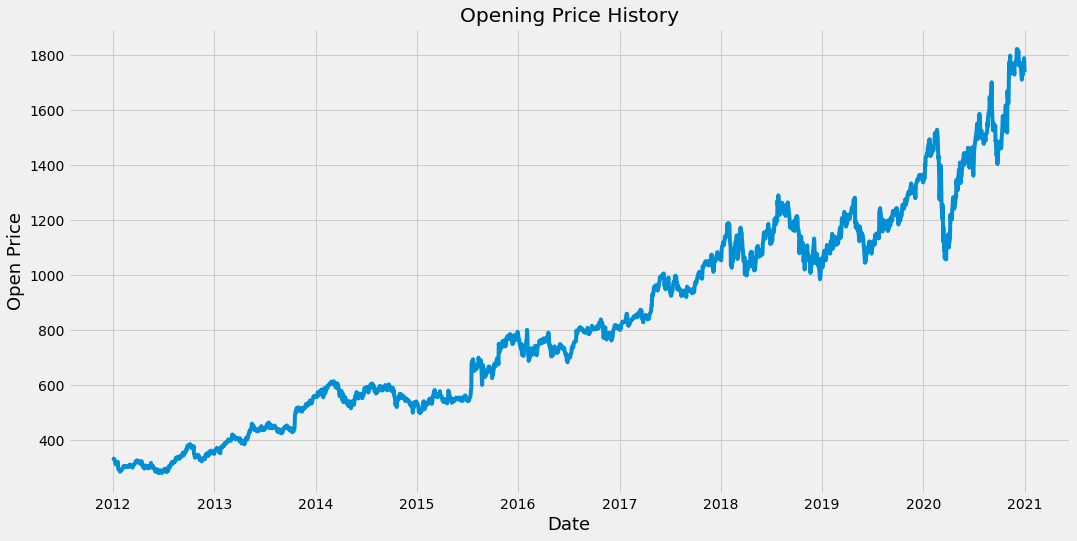

In [76]:
# Visualize the opening price history

plt.figure(figsize = (16, 8))
plt.title('Opening Price History')
plt.plot(df['Open'])

plt.xlabel('Date' , fontsize = '18')
plt.ylabel('Open Price' , fontsize = '18')

plt.show()

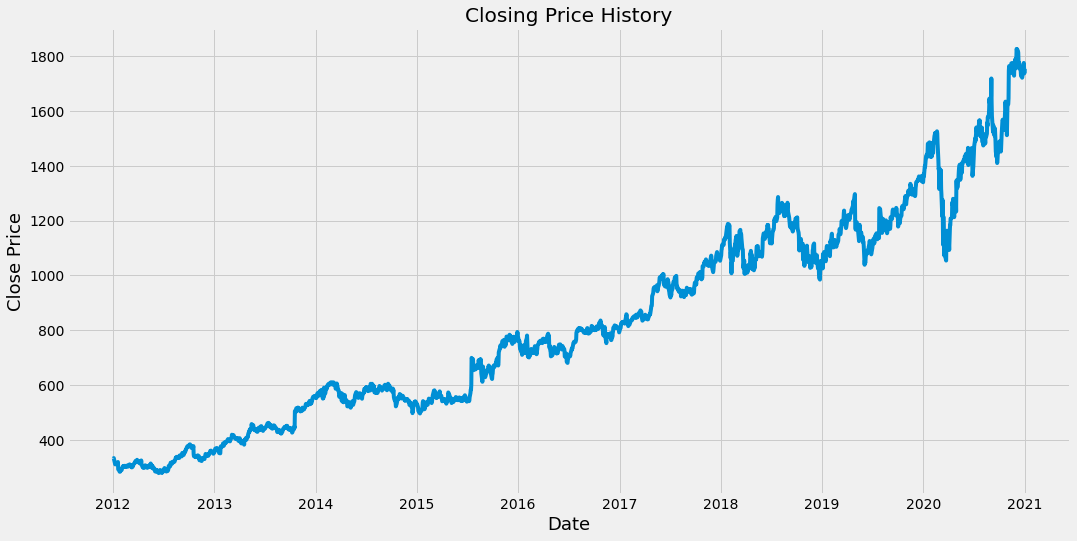

In [77]:
# Visualize the close price history

plt.figure(figsize = (16, 8))
plt.title('Closing Price History')
plt.plot(df['Close'])

plt.xlabel('Date' , fontsize = '18')
plt.ylabel('Close Price' , fontsize = '18')

plt.show()

In [78]:
# Use a dataframe having only Close column

data = df.filter(['Close'])

# Convert data into np array

dataset = data.values

# Get the number of rows to train the model on

training_data_len = math.ceil(len(dataset) * 0.8) # Specifying 80 percent as training data

In [79]:
training_data_len

1812

In [80]:
# Scaling the data

scaler = MinMaxScaler(feature_range=(0, 1))
  # Scales values of dataset between 0 & 1

scaled_data = scaler.fit_transform(dataset)

In [81]:
scaled_data.shape

(2265, 1)

In [82]:
# Creating training dataset 

# Creating the scaled training dataset

train_data = scaled_data[0:training_data_len , :]

# Splitting train into x_train & y_train

x_train = []    # Training features
y_train = []    # Target variables

for i in range(60 , len(train_data)):  # 60 days 

    x_train.append(train_data[i-60:i , 0])  # 60 values from position 0 to 59
    y_train.append(train_data[i,0])         # 61st value with position 60

    if (i <= 61):

        print(x_train)
        print(y_train)
        print()

[array([0.03445147, 0.03538112, 0.03237843, 0.02946644, 0.02053937,
       0.02075965, 0.02167308, 0.02286508, 0.02135888, 0.02252174,
       0.02392427, 0.02608154, 0.00872625, 0.00857399, 0.00708724,
       0.00338166, 0.00293141, 0.00677951, 0.00603775, 0.00682162,
       0.00705485, 0.00844119, 0.01207551, 0.01620865, 0.01545717,
       0.01645482, 0.01697633, 0.01517861, 0.01721602, 0.01642567,
       0.01506522, 0.01537619, 0.01476723, 0.01779907, 0.01583614,
       0.01524339, 0.01647102, 0.01627991, 0.01922106, 0.01917571,
       0.02051994, 0.02014745, 0.01788005, 0.01487088, 0.01546689,
       0.01557702, 0.01334524, 0.01493242, 0.01902345, 0.01844366,
       0.02010858, 0.02137507, 0.02427087, 0.02411216, 0.02621435,
       0.02818051, 0.02705976, 0.02924295, 0.0284947 , 0.03132572])]
[0.028944952015694747]

[array([0.03445147, 0.03538112, 0.03237843, 0.02946644, 0.02053937,
       0.02075965, 0.02167308, 0.02286508, 0.02135888, 0.02252174,
       0.02392427, 0.02608154, 0.0

In [83]:
train_data.shape

(1812, 1)

In [84]:
len(y_train)

1752

In [85]:
# Convert x_train & y_train into np arrays for putting into LSTM model

x_train , y_train = np.array(x_train) , np.array(y_train)

In [86]:
y_train.shape

(1752,)

In [87]:
# Reshaping the data

# LSTM needs it in such a way which is 3d , right now ours is 2d

x_train = np.reshape(x_train , (x_train.shape[0] , x_train.shape[1] , 1))
x_train.shape

(1752, 60, 1)

In [88]:
# Building the LSTM models


model = Sequential()

model.add(LSTM(50 , return_sequences= True , input_shape =(x_train.shape[1],1)))
model.add(LSTM(50 , return_sequences=False))

model.add(Dense(25))
model.add(Dense(1))

In [89]:
# Compiling the model

model.compile(optimizer = 'adam' , loss = 'mean_squared_error')

In [90]:
# Training the model

model.fit(x_train , y_train , batch_size = 1, epochs = 1)

1752/1752 [==============================] - 37s 20ms/step - loss: 0.0026


In [91]:
# Creating test data set

# Creating array from index 1752 to 2265

test_data = scaled_data[training_data_len - 60 : ,:]

# Creating x_test & y_test

x_test = []
y_test = []

y_test = dataset[training_data_len: , :]  # All values that our model will predict

for i in range(60 , len(test_data)):

    x_test.append(test_data[i-60:i , 0])
    

In [92]:
# Converting data again , to np array

x_test = np.array(x_test)

# Reshaping this data for LSTM model 

x_test = np.reshape(x_test , (x_test.shape[0] , x_test.shape[1] , 1))

In [93]:
# Get the predicted values

predictions = model.predict(x_test)

predictions = scaler.inverse_transform(predictions) # Unscaling the values from 0-1 to noraml ones that were already present

In [94]:
# Evaluation of our model

# Getting RMSE as a metric

rmse=np.sqrt(np.mean(predictions- y_test)**2)

rmse

10.739654473647903

#### **A good score**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


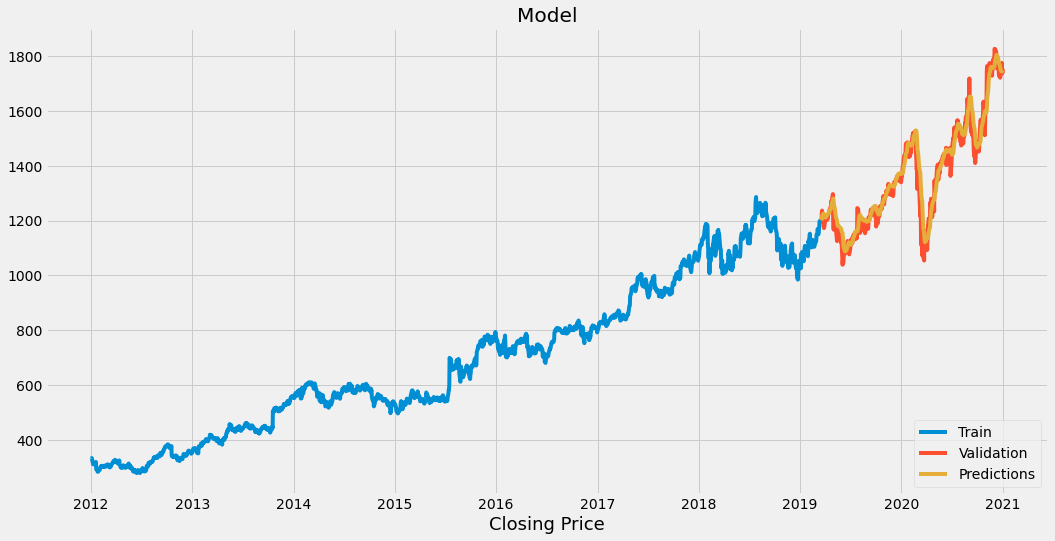

In [95]:
# Plotting the data

train = data[:training_data_len]
valid = data[training_data_len:]

valid['Predictions'] = predictions

plt.figure(figsize = (16 , 8))

plt.title('Model')
plt.xlabel('Date', fontsize = 18)
plt.xlabel('Closing Price', fontsize = 18)

plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])

plt.legend(['Train' , 'Validation', 'Predictions'],
           loc = 'lower right')


plt.show()

In [96]:
# Show the valid & predicted prices

valid

,Close,Predictions
Date,,
2019-03-19,1202.459961,1200.518433
2019-03-20,1226.430054,1204.659668
2019-03-21,1236.130005,1210.828613
2019-03-22,1207.650024,1218.368164
2019-03-25,1197.380005,1223.120361
...,...,...
2020-12-24,1734.160034,1746.070312
2020-12-28,1773.959961,1742.601929
2020-12-29,1757.760010,1744.403198
